<a href="https://colab.research.google.com/github/SK-Faizan-Nasir/MilkQualityPrediction/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sb
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras import Model
import tensorflow.keras.metrics as tkm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
#dbp alias for dairy buddy project
dbp_df=pd.read_csv("/content/drive/MyDrive/Projects/DairyBuddy/milknew.csv")

In [ ]:
dbp_df.head()
#checking top 5 rows

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
dbp_df.tail()
#checking last 5 rows

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


Applying descriptive statistics

In [ ]:
dbp_df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
dbp_df.describe(include='all')

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,429
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,NaN
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,NaN
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,NaN
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,NaN
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,NaN
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,NaN


Check Data types in dataset


In [ ]:
dbp_df.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

As we can see all data types are numerical except for the one categorical variable which is our dependent variable.

Check for null entries in the data

In [ ]:
dbp_df.isnull().values.any()

False

In [ ]:
dbp_df.isnull()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1054,False,False,False,False,False,False,False,False
1055,False,False,False,False,False,False,False,False
1056,False,False,False,False,False,False,False,False
1057,False,False,False,False,False,False,False,False


In [ ]:
dbp_df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

As seen there are no null values to be imputed or dropped so we can proceed

Let's visualize the data to get better insights

Correlation matrix

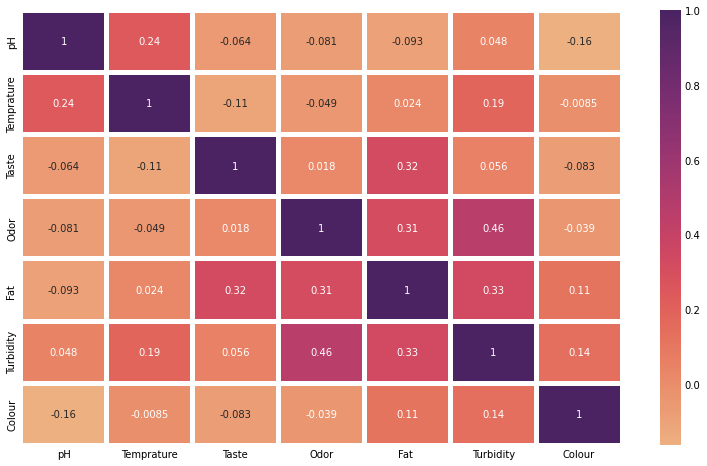

In [ ]:
plt.figure(figsize=(12,8))
sb.heatmap(dbp_df.corr(), annot = True, cmap='flare', linewidths=4)

From the above plot we can confirm that there are no highly correlated data.
### Pairplot to analyse distribution and relationship amongst variables.

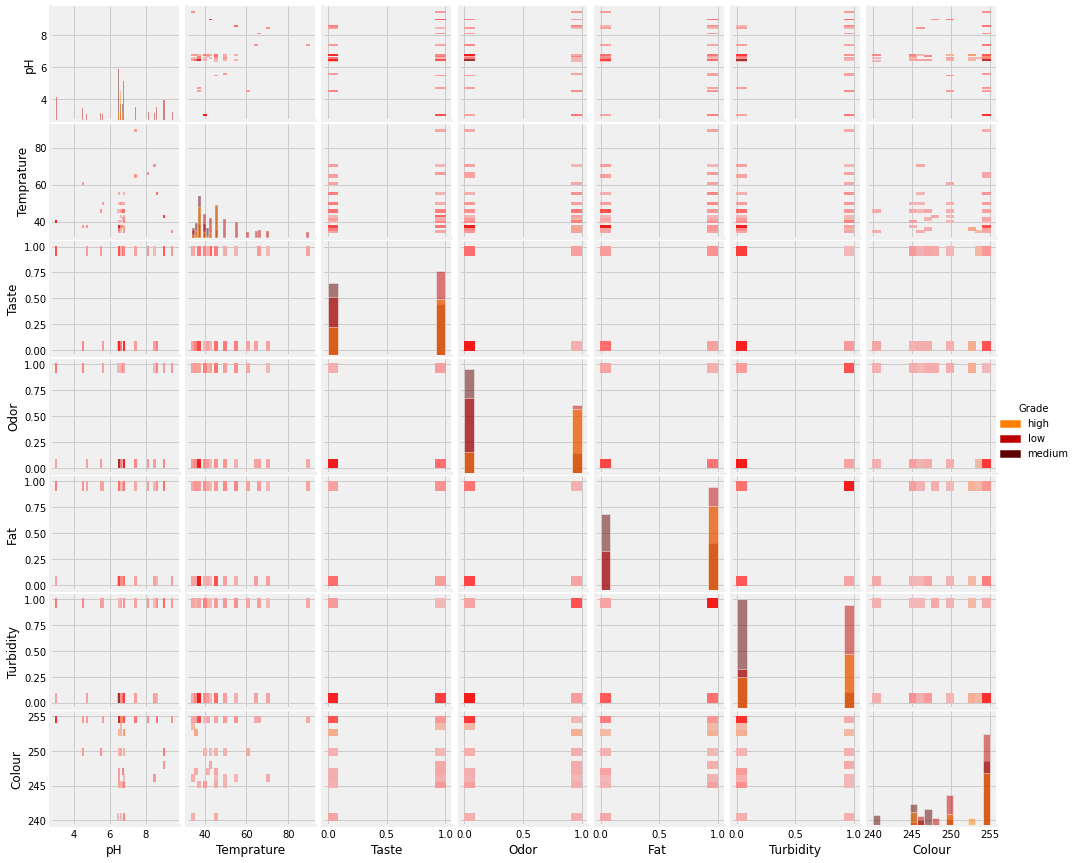

In [ ]:
dbp_g=sb.pairplot(dbp_df,hue='Grade',kind='hist',palette='gist_heat_r')
dbp_g.fig.set_size_inches(15,12)

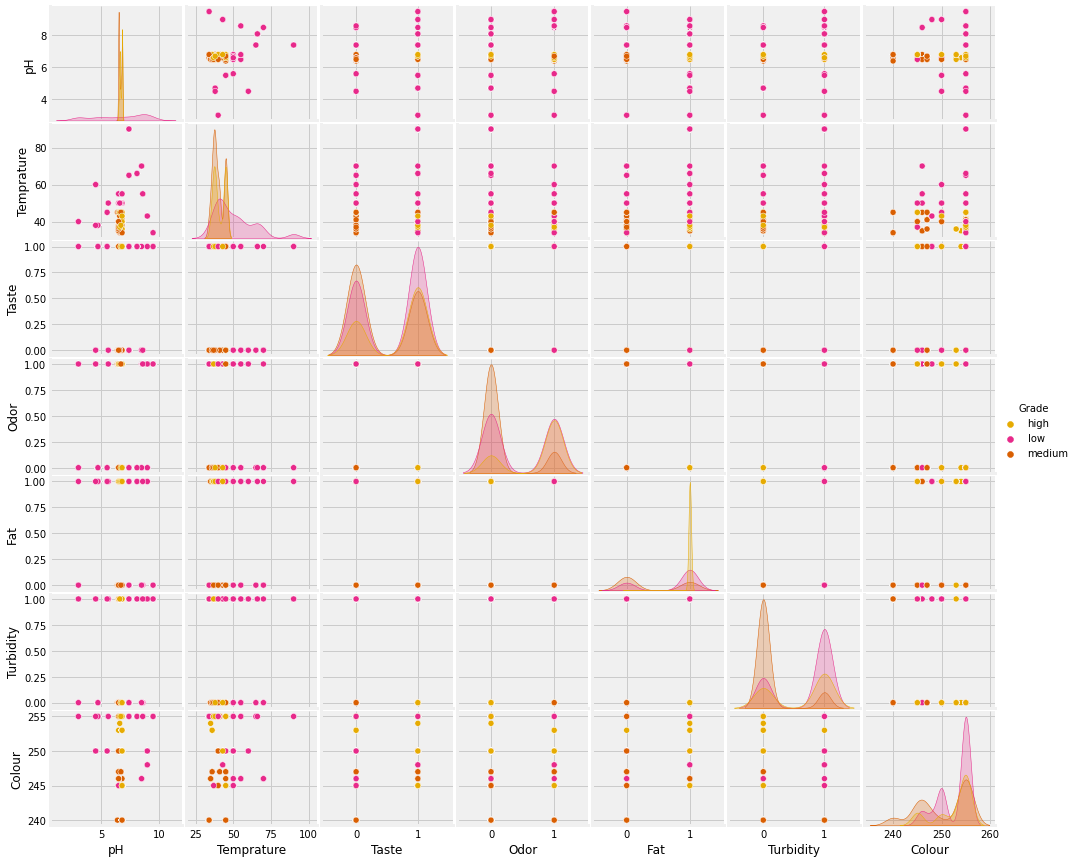

In [ ]:
dbp_g=sb.pairplot(dbp_df,hue='Grade',kind='scatter',palette='Dark2_r')
dbp_g.fig.set_size_inches(15,12)

The relations amongst dataset are not that strong hence we can move forward

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


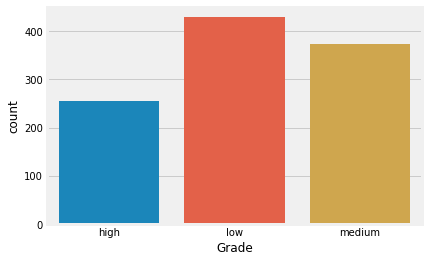

In [ ]:
sb.countplot(dbp_df['Grade'])

The data is not imbalanced as observed from the count plot so there is no need for smote analysis

Divide data into training and testing set

In [ ]:
dbp_X=dbp_df.drop("Grade",axis=1)
dbp_X.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [ ]:
dbp_Y=dbp_df['Grade']
dbp_Y

0         high
1         high
2          low
3          low
4       medium
         ...  
1054    medium
1055      high
1056       low
1057      high
1058       low
Name: Grade, Length: 1059, dtype: object

In [ ]:
dbp_m={
"low":0,
"medium":1,
"high":2
}

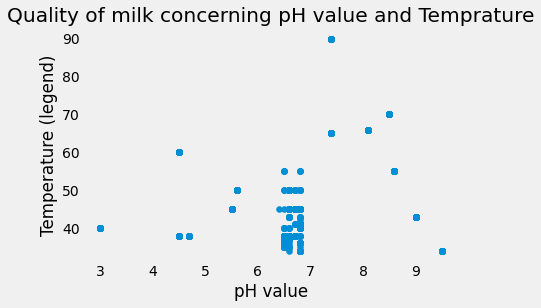

In [ ]:
plt.style.use('fivethirtyeight')
dbp_scatter = plt.scatter(dbp_df["pH"], dbp_df["Temprature"],cmap = "coolwarm")
plt.title("Quality of milk concerning pH value and Temprature")
plt.xlabel("pH value")
plt.ylabel("Temperature (legend)")
plt.grid()
plt.show()

In [ ]:
dbp_Y=dbp_Y.map(dbp_m)
dbp_Y

0       2
1       2
2       0
3       0
4       1
       ..
1054    1
1055    2
1056    0
1057    2
1058    0
Name: Grade, Length: 1059, dtype: int64

We have mapped out categorical dependent variable such that:


i. Low is represented by 0


ii. Medium is represented by 1


iii. High is represented by 2

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


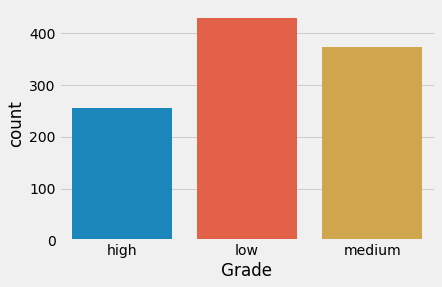

In [ ]:
sb.countplot(dbp_df['Grade'])

In [ ]:
class DairyBuddy:
  def __init__(self,ModelName,predictor):
    self.ModelName=ModelName
    self.predictor=predictor
  def build_model(self,dbp_xtrain,dbp_ytrain):
    """Builds the model"""
    self.model=self.predictor.fit(dbp_xtrain,dbp_ytrain)
  def get_model(self,model):
    self.model=model
  def return_model(self):
    """Returns Model"""
    return self.model
  def check_testing_accuracy(self,dbp_xtest,dbp_ytest):
    """Returns Testing Accuracy"""
    self.dbp_ypredtest=self.model.predict(dbp_xtest)
    self.dbp_testacc=accuracy_score(dbp_ytest,self.dbp_ypredtest)
   # print("Accuracy Score Of",self.ModelName," is: ",self.dbp_testacc)
    return self.dbp_testacc
  def check_training_accuracy(self,dbp_xtrain,dbp_ytrain):
    """Returns Training Accuracy"""
    self.dbp_ypredtrain=self.model.predict(dbp_xtrain)
    self.dbp_trainacc=accuracy_score(dbp_ytrain,self.dbp_ypredtrain)
    #print("Accuracy Score Of",self.ModelName," is: ",self.dbp_trainacc)
    return self.dbp_trainacc
  def show_metrics(self,dbp_X,dbp_Y,dbp_xtrain,dbp_ytrain,dbp_xtest,dbp_ytest):
    """Produces result of evaluation metrics"""
    self.check_testing_accuracy(dbp_xtest,dbp_ytest)
    self.dbp_precision = precision_score(self.dbp_ypredtest, dbp_ytest, average='micro')
    self.dbp_recall = recall_score(self.dbp_ypredtest, dbp_ytest, average='micro') 
    self.dbp_f1 = f1_score(self.dbp_ypredtest, dbp_ytest, average='micro')
    self.dbp_cvscore= cross_val_score(self.model,dbp_X,dbp_Y,cv=5).mean()
    self.result = pd.DataFrame([[self.ModelName, 100*self.dbp_testacc , 100*self.dbp_precision, 100*self.dbp_recall, 100*self.dbp_f1, 100*self.dbp_cvscore]],
                  columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cross Validation Score'])
    #print(self.result)
    return self.result
  def edibility_test(self,dbp_xvalue):
    """Edibility Testing Function"""
    dbp_pred=self.model.predict(dbp_xvalue)
    if dbp_pred==[0]:
      return "Not Edible! Low Quality Milk"
    elif dbp_pred==[1]:
      return "Edible!"
    elif dbp_pred==[2]:
      return "Edible and nutritious! High Quality Milk"
    


In [ ]:
dbp_xtrain,dbp_xtest,dbp_ytrain,dbp_ytest=train_test_split(dbp_X,dbp_Y,test_size=0.25,random_state=2)
print(f"Xtrain Shape: {dbp_xtrain.shape},Xtest shape: {dbp_xtest.shape},Ytrain shape: {dbp_ytrain.shape},Ytest shape: {dbp_ytest.shape}")

Xtrain Shape: (794, 7),Xtest shape: (265, 7),Ytrain shape: (794,),Ytest shape: (265,)


Lets start building Our ML models and compare them

1. Gaussian Naive Bayes

In [ ]:
dbp_nbclf=DairyBuddy("Naive Bayes",GaussianNB())
dbp_nbclf.build_model(dbp_xtrain,dbp_ytrain)
dbp_nbclf.show_metrics(dbp_X,dbp_Y,dbp_xtrain,dbp_ytrain,dbp_xtest,dbp_ytest)

,Model,Accuracy,Precision,Recall,F1 Score,Cross Validation Score
0,Naive Bayes,84.150943,84.150943,84.150943,84.150943,91.788876


Naive Bayes did well lets continue building others

2. SVM

In [ ]:
dbp_svmclf=DairyBuddy("SVM",SVC())
dbp_svmclf.build_model(dbp_xtrain,dbp_ytrain)
dbp_svmclf.show_metrics(dbp_X,dbp_Y,dbp_xtrain,dbp_ytrain,dbp_xtest,dbp_ytest)

,Model,Accuracy,Precision,Recall,F1 Score,Cross Validation Score
0,SVM,50.566038,50.566038,50.566038,50.566038,53.160154


3. KNN

In [ ]:
dbp_knnclf=DairyBuddy("KNN",KNeighborsClassifier(n_neighbors=3))
dbp_knnclf.build_model(dbp_xtrain,dbp_ytrain)
dbp_knnclf.show_metrics(dbp_X,dbp_Y,dbp_xtrain,dbp_ytrain,dbp_xtest,dbp_ytest)

,Model,Accuracy,Precision,Recall,F1 Score,Cross Validation Score
0,SVM,99.622642,99.622642,99.622642,99.622642,99.149155


4. Random Forest

In [ ]:
dbp_rfclf=DairyBuddy("Random Forest",RandomForestClassifier())
dbp_rfclf.build_model(dbp_xtrain,dbp_ytrain)
dbp_rfclf.show_metrics(dbp_X,dbp_Y,dbp_xtrain,dbp_ytrain,dbp_xtest,dbp_ytest)

,Model,Accuracy,Precision,Recall,F1 Score,Cross Validation Score
0,Random Forest,99.622642,99.622642,99.622642,99.622642,99.621747


5. XgBoost

In [ ]:
dbp_xgbclf=DairyBuddy("XgBoost",XGBClassifier())
dbp_xgbclf.build_model(dbp_xtrain,dbp_ytrain)
dbp_xgbclf.show_metrics(dbp_X,dbp_Y,dbp_xtrain,dbp_ytrain,dbp_xtest,dbp_ytest)

,Model,Accuracy,Precision,Recall,F1 Score,Cross Validation Score
0,XgBoost,100.0,100.0,100.0,100.0,99.433068


So far we have seen many improvements and variations in the accuracy matrices
The best cross validation score was given by random forest however Xgboost was superior in the other metrics.

Let's now implement some deep learning model and see it's performance

1. Multi Layer Perceptron

In [ ]:
dbp_mlpclf=DairyBuddy("MLP",MLPClassifier())
dbp_mlpclf.build_model(dbp_xtrain,dbp_ytrain)
dbp_mlpclf.show_metrics(dbp_X,dbp_Y,dbp_xtrain,dbp_ytrain,dbp_xtest,dbp_ytest)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1 Score,Cross Validation Score
0,MLP,79.622642,79.622642,79.622642,79.622642,75.06796


The results are good but let's do some parameter tuning 

In [ ]:
dbp_mlpclf=DairyBuddy("MLP",MLPClassifier(random_state=0, max_iter=700,solver='lbfgs'))
dbp_mlpclf.build_model(dbp_xtrain,dbp_ytrain)

dbp_mlpclf.show_metrics(dbp_X,dbp_Y,dbp_xtrain,dbp_ytrain,dbp_xtest,dbp_ytest)

,Model,Accuracy,Precision,Recall,F1 Score,Cross Validation Score
0,MLP,77.735849,77.735849,77.735849,77.735849,74.133059


Some parameter tuning was enough to boost the model.
Although these models seem to be good enough to carry out the job, We will implemet NN to see it's performance as well.

2. Neural Networks

In [ ]:
dbp_NN=Sequential()
dbp_NN.add(Input(shape=(7,)))
dbp_NN.add(Dense(units=14,activation='relu'))
dbp_NN.add(Dropout(0.2))
dbp_NN.add(Dense(units=28,activation='sigmoid'))
dbp_NN.add(Dropout(0.2))
dbp_NN.add(Dense(units=14,activation='sigmoid'))
dbp_NN.add(Dropout(0.2))
dbp_NN.add(Dense(units=7,activation='relu'))
dbp_NN.add(Dropout(0.2))
dbp_NN.add(Dense(units=1,activation='softmax'))

In [ ]:
dbp_NN.compile(Adam(),loss='CategoricalCrossentropy',metrics=["accuracy"])
dbp_NN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 14)                112       
                                                                 
 dropout_4 (Dropout)         (None, 14)                0         
                                                                 
 dense_6 (Dense)             (None, 28)                420       
                                                                 
 dropout_5 (Dropout)         (None, 28)                0         
                                                                 
 dense_7 (Dense)             (None, 14)                406       
                                                                 
 dropout_6 (Dropout)         (None, 14)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                

In [ ]:
dbp_NN.fit(dbp_xtrain,dbp_ytrain,epochs=500,validation_data=(dbp_xtest,dbp_ytest))

Epoch 1/500
25/25 [==============================] - 1s 10ms/step - loss: 0.0000e+00 - accuracy: 0.3539 - val_loss: 0.0000e+00 - val_accuracy: 0.3509
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3539 - val_loss: 0.0000e+00 - val_accuracy: 0.3509
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3539 - val_loss: 0.0000e+00 - val_accuracy: 0.3509
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3539 - val_loss: 0.0000e+00 - val_accuracy: 0.3509
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3539 - val_loss: 0.0000e+00 - val_accuracy: 0.3509
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3539 - val_loss: 0.0000e+00 - val_accuracy: 0.3509
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3539 - 

3. DNN Classifier

In [ ]:
dbp_X=dbp_df.drop('Grade',axis=1)
dbp_X.rename(columns = {'Fat ':'Fat'}, inplace = True)

dbp_X

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [ ]:
dbp_xtrain,dbp_xtest,dbp_ytrain,dbp_ytest=train_test_split(dbp_X,dbp_Y,test_size=0.25,random_state=2)
print(f"Xtrain Shape: {dbp_xtrain.shape},Xtest shape: {dbp_xtest.shape},Ytrain shape: {dbp_ytrain.shape},Ytest shape: {dbp_ytest.shape}")

Xtrain Shape: (794, 7),Xtest shape: (265, 7),Ytrain shape: (794,),Ytest shape: (265,)


In [ ]:
dbp_columns=list(dbp_df.columns)[:7]
dbp_columns

['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']

In [ ]:

dbp_gr=['low','medium','high']

In [ ]:
def dbp_infn(inp_features,inp_labels,tr=True,batch_size=128):
  #"""input function for dnn classifier"""
  dbp_ds=tf.data.Dataset.from_tensor_slices((dict(inp_features),inp_labels))
  if tr:
    dbp_ds=dbp_ds.shuffle(1000).repeat()
  return dbp_ds.batch(batch_size)

In [ ]:
dbp_feature_c=[]
for k in dbp_xtrain.keys():
  dbp_feature_c.append(tf.feature_column.numeric_column(key=k))
print(dbp_feature_c)

[NumericColumn(key='pH', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Temprature', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Taste', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Odor', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Fat', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Turbidity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Colour', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [ ]:
dbp_dnnclf=tf.estimator.DNNClassifier(feature_columns=dbp_feature_c,hidden_units=[30,10],n_classes=3)

In [ ]:
dbp_dnnclf.train(input_fn=lambda: dbp_infn(dbp_xtrain,dbp_ytrain)
,steps=35000)

In [ ]:
dbp_eval=dbp_dnnclf.evaluate(input_fn=lambda: dbp_infn(dbp_xtest,dbp_ytest,tr=False))


In [ ]:
print('Testing Accuracy: {accuracy:0.4f}\n'.format(**dbp_eval))

Testing Accuracy: 0.7358



We can see that the deep learning model did perform fairly but we can conclude that XgBoost is the best fit classifier for this data.
Lets check our edibility function for the same

In [ ]:
ed_data=np.array([dbp_X.loc[0],])
ed_data=pd.DataFrame(ed_data,columns=dbp_columns)
ed_data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35.0,1.0,0.0,1.0,0.0,254.0


In [ ]:
dbp_xgbclf.edibility_test(ed_data)

'Edible and nutritious! High Quality Milk'

In [ ]:
#Lets check the original and see
dbp_df.loc[0]

pH             6.6
Temprature      35
Taste            1
Odor             0
Fat              1
Turbidity        0
Colour         254
Grade         high
Name: 0, dtype: object

We have succesfully examined the edibility and will save our model for future score of this project.

In [ ]:
dbp_classifier=dbp_xgbclf.return_model()

In [ ]:
import pickle
pickle.dump(dbp_classifier,open('/content/drive/MyDrive/Projects/DairyBuddy/DairyBuddyModel.pkl','wb'))